# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

pop_size=10_000
size1=10_000_000
size2=20_000_000
batch1=1
batch2=1_000
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include randomness in the state transitions (e.g., maternity leave)

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 65
max_retirementage 70
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
deterministic False

include_putki None
step 0.25

train...
phase 1
training...






---------------------------------
| explained_variance | 0.000345 |
| fps                | 1796     |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| policy_loss        | 54.3     |
| total_timesteps    | 0        |
| value_loss         | 1.62e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.878    |
| fps                | 2318     |
| nupdates           | 1000     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.807   |
| total_timesteps    | 2458539  |
| value_loss         | 14       |
---------------

2684556 timesteps 13356 episodes
Best mean reward: 218.87 - Last mean reward per episode: 218.34
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 215.34592 |
| explained_variance | 0.816     |
| fps                | 3245      |
| nupdates           | 13        |
| policy_entropy     | 0.578     |
| policy_loss        | -1.42     |
| total_timesteps    | 2479692   |
| value_loss         | 21.3      |
----------------------------------
2891988 timesteps 14388 episodes
Best mean reward: 218.87 - Last mean reward per episode: 218.26
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 219.22537 |
| explained_variance | 0.824     |
| fps                | 3245      |
| nupdates           | 14        |
| policy_entropy     | 0.569     |
| policy_loss        | -1.27     |
| total_timesteps    | 2686333   |
| value_loss         | 18.8      |
----------------------------------
3099420 timesteps 15420 episodes
Bes

6198840 timesteps 30840 episodes
New best mean reward: 219.16 - Last best reward per episode: 219.15
saved as  best/best_perus
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 216.58308 |
| explained_variance | 0.838     |
| fps                | 3241      |
| nupdates           | 30        |
| policy_entropy     | 0.582     |
| policy_loss        | 0.58      |
| total_timesteps    | 5992589   |
| value_loss         | 14        |
----------------------------------
6403860 timesteps 31860 episodes
Best mean reward: 219.16 - Last mean reward per episode: 218.98
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 218.7474 |
| explained_variance | 0.847    |
| fps                | 3241     |
| nupdates           | 31       |
| policy_entropy     | 0.589    |
| policy_loss        | 0.626    |
| total_timesteps    | 6199230  |
| value_loss         | 13.5     |
---------------------------------
6611292 timesteps

9710712 timesteps 48312 episodes
Best mean reward: 219.28 - Last mean reward per episode: 218.67
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 219.19891 |
| explained_variance | 0.845     |
| fps                | 3242      |
| nupdates           | 47        |
| policy_entropy     | 0.578     |
| policy_loss        | -0.57     |
| total_timesteps    | 9505486   |
| value_loss         | 13        |
----------------------------------
9918144 timesteps 49344 episodes
Best mean reward: 219.28 - Last mean reward per episode: 218.65
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 220.37115 |
| explained_variance | 0.85      |
| fps                | 3242      |
| nupdates           | 48        |
| policy_entropy     | 0.583     |
| policy_loss        | -0.583    |
| total_timesteps    | 9712127   |
| value_loss         | 12.9      |
----------------------------------
10123164 timesteps 50364 episodes
Be

13430016 timesteps 66816 episodes
New best mean reward: 219.40 - Last best reward per episode: 219.28
saved as  best/best_perus
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 218.08682 |
| explained_variance | 0.852     |
| fps                | 3242      |
| nupdates           | 65        |
| policy_entropy     | 0.577     |
| policy_loss        | 0.45      |
| total_timesteps    | 13225024  |
| value_loss         | 11.7      |
----------------------------------
13637448 timesteps 67848 episodes
Best mean reward: 219.40 - Last mean reward per episode: 219.28
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 217.94638 |
| explained_variance | 0.845     |
| fps                | 3242      |
| nupdates           | 66        |
| policy_entropy     | 0.586     |
| policy_loss        | 0.32      |
| total_timesteps    | 13431665  |
| value_loss         | 12.8      |
----------------------------------
1384

16944300 timesteps 84300 episodes
Best mean reward: 219.49 - Last mean reward per episode: 219.08
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 218.2537 |
| explained_variance | 0.861    |
| fps                | 3242     |
| nupdates           | 82       |
| policy_entropy     | 0.565    |
| policy_loss        | -0.0489  |
| total_timesteps    | 16737921 |
| value_loss         | 11       |
---------------------------------
17149320 timesteps 85320 episodes
Best mean reward: 219.49 - Last mean reward per episode: 219.07
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 220.26143 |
| explained_variance | 0.854     |
| fps                | 3242      |
| nupdates           | 83        |
| policy_entropy     | 0.57      |
| policy_loss        | -0.0247   |
| total_timesteps    | 16944562  |
| value_loss         | 12        |
----------------------------------
17356752 timesteps 86352 episodes
Best mean r

0.5955354024445837
20 70 (205,)


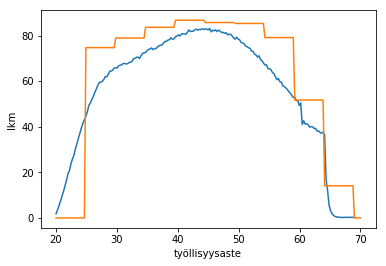

best_emp 0
Vaikutus työllisyyteen keskiarvo 1887332.0 htv, mediaani 1887332.0 htv
                        keskiarvo 1899509.0 työllistä, mediaani 1899509.0 työllistä


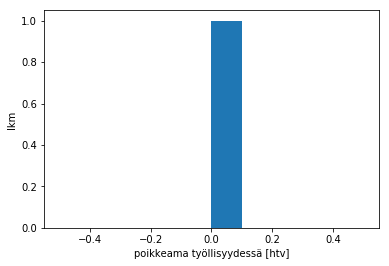

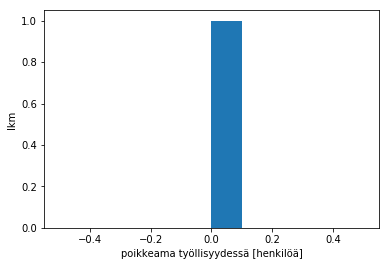

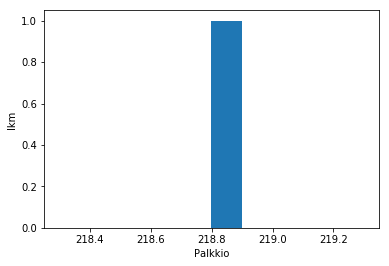

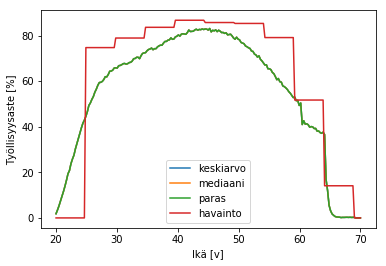

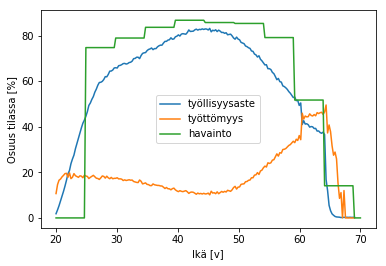

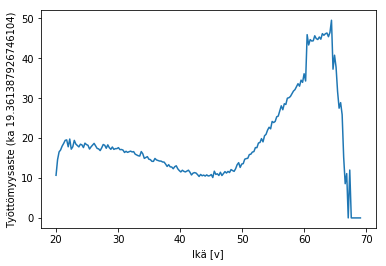

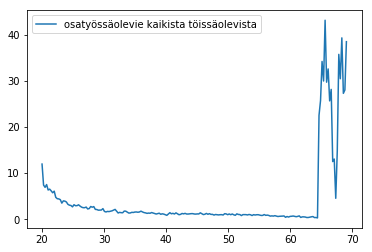

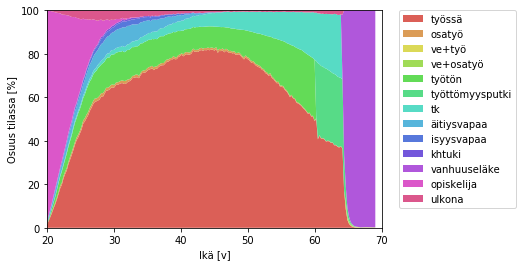

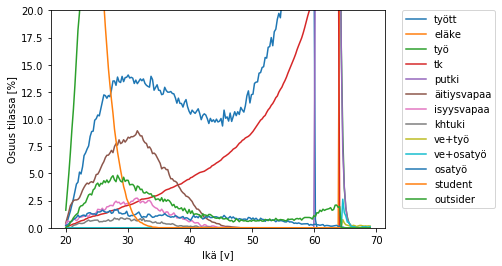

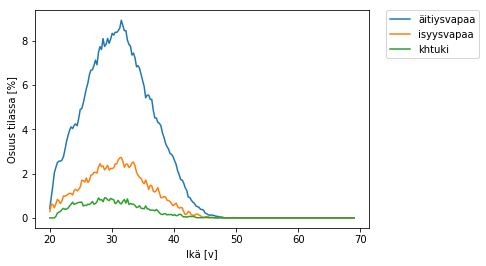

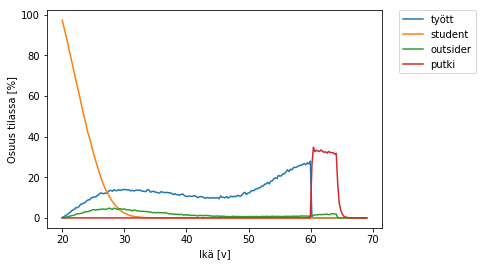

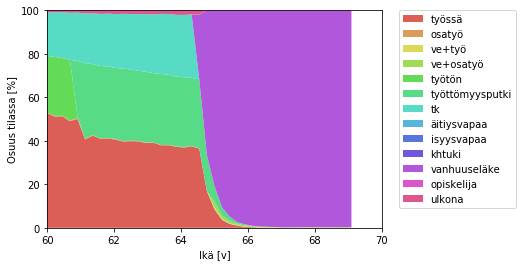

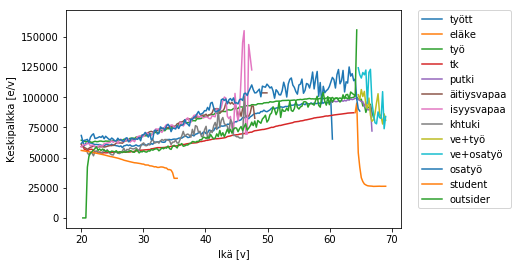

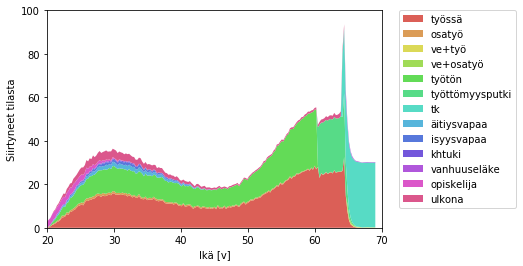

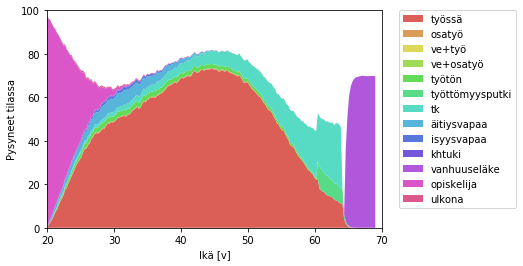

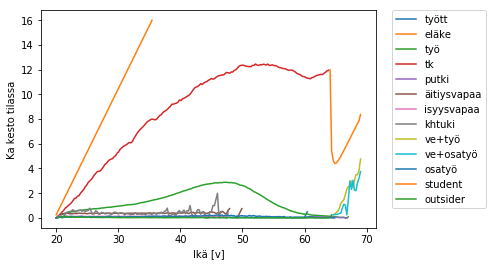

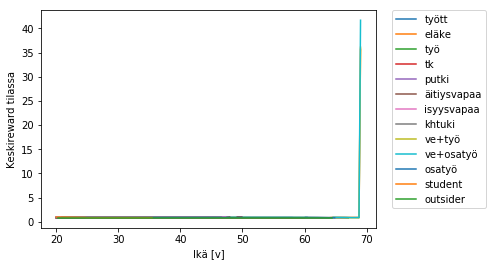

No handles with labels found to put in legend.


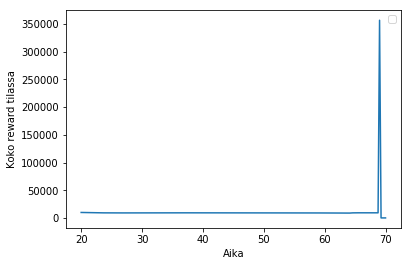

Yhteensä reward 218.7994747597223


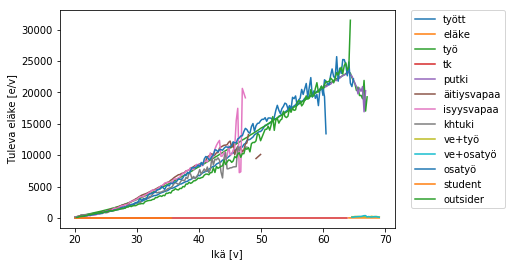

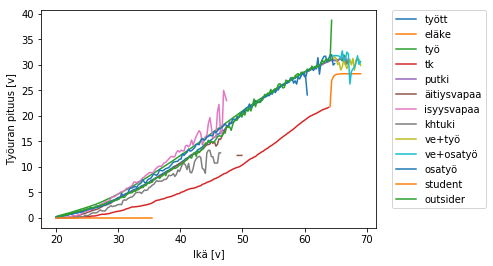

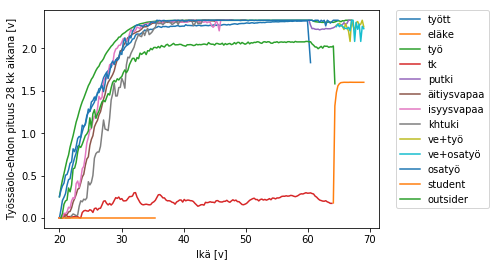

In [4]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              deterministic=deterministic,randomness=randomness)

cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_perus',
                plot=True,save='saved/perusmalli',cont=False,start_from='best/best_perus',
                results='results/perus_res_')
cc1.render(load='results/perus_res__best')

# Porrastettu työttömyysturva



In [ ]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_steps',plot=True,
                save='saved/malli_steps',results='results/steps_res_',start_from='best/best_steps')
cc2_porras.render(load='results/steps_res__best')
#cc2_porras.compare_with(cc1)

In [ ]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.render(load='results/steps_res__best')

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [ ]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_ek',plot=True,
                save='saved/malli_ek',results='results/ek_res_',start_from='best/best_ek')
cc2.render(load='results/ek_res__best')

In [ ]:
cc2.compare_with(cc1)

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_12kk',plot=True,
                    save='saved/malli_12',results='results/12kk_res_',start_from='best/best_12kk')
cc1_toe.render(load='results/12kk_res__best')

In [ ]:
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_50pv',plot=True,
                    save='saved/malli_ek',results='results/50pv_res_')
cc1_350.render(load='results/50pv_res__best')

In [ ]:
cc1_350.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputki on suosittu elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_putki',
                      plot=True,save='saved/malli_putki',results='results/putki_res_')
cc1_350.render(load='results/putki_res__best')
cc1_putki.compare_with(cc1)                    

# Perustulo

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_pt',plot=True,
                   save='saved/malli_pt',results='results/perustulo_res_')
cc1_pt.render(load='results/perustulo_res__best')

In [ ]:
cc1_pt.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best/best_300pv',plot=True,
                    save='saved/malli_300',results='results/300pv_res_')
cc1_400.render(load='results/300pv_res__best')
cc1_400.compare_with(cc1)